In [1]:
import sys
sys.path.append('../')
import glob
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import torch
import torchvision
from src.utils import FileUtils
from src.logger import Logger
from src import config
from src.dataset import AlbumentationImageDataset
import random
import pandas as pd
plt.style.use('fivethirtyeight')

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
no_of_masked_faces = len(glob.glob('../data/with_mask/*.jpg'))
no_of_non_masked_faces = len(glob.glob('../data/without_mask/*.jpg'))

In [3]:
print(f'Number Masked Faces samples: {no_of_masked_faces}')
print(f'Number Non-Masked Faces samples: {no_of_non_masked_faces}')

Number Masked Faces samples: 686
Number Non-Masked Faces samples: 686


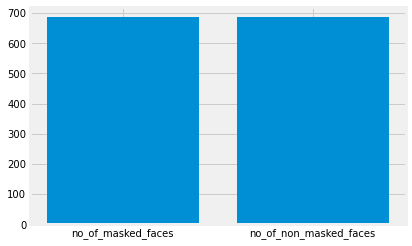

In [4]:
plt.bar(['no_of_masked_faces','no_of_non_masked_faces'], [no_of_masked_faces,no_of_non_masked_faces])
plt.show()

The class labels are more or less balanced.

In [5]:
def load_image(img_path, resize=True):
  img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

  if resize:
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)

  return img

def show_image(img_path):
  img = load_image(img_path)
  plt.imshow(img)
  plt.axis('off')

def show_sign_grid(image_paths,label):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.title(f'Faces with {label}')
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

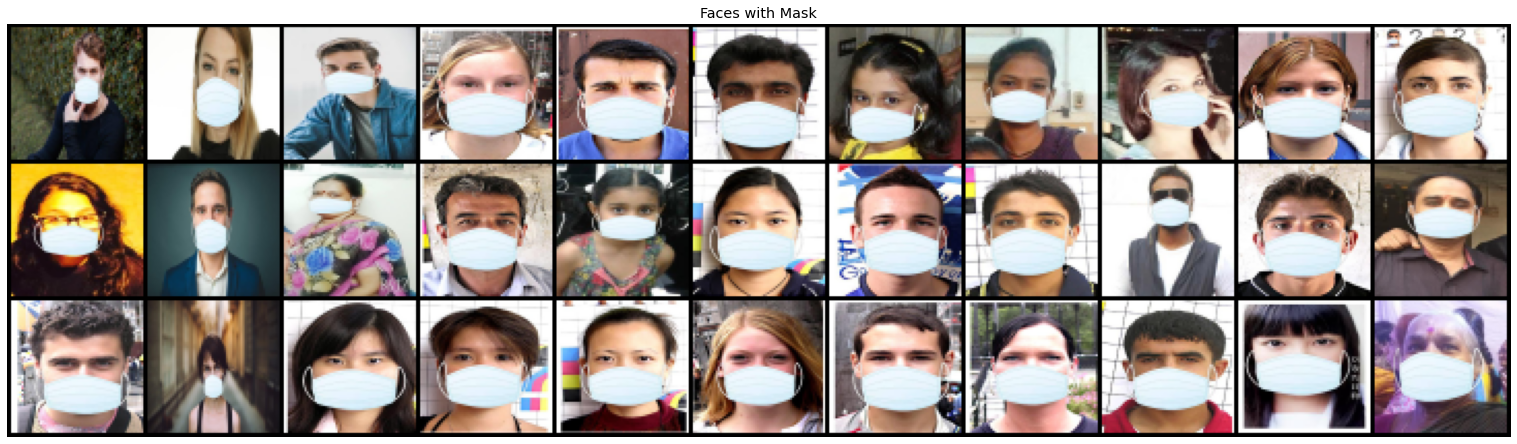

In [6]:
sample_images = sorted(glob.glob('../data/with_mask/*.jpg'))[:33]
show_sign_grid(sample_images,'Mask')

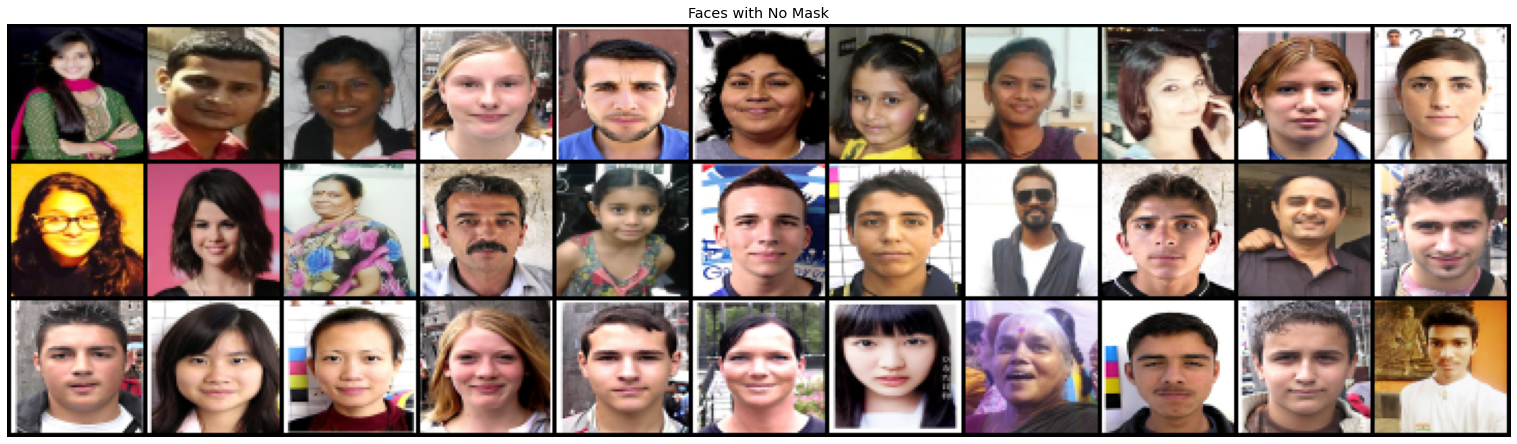

In [7]:
sample_images = sorted(glob.glob('../data/without_mask/*.jpg'))[:33]
show_sign_grid(sample_images,'No Mask')

In [8]:
fileutils = FileUtils(base_path_for_files = os.path.join('..','data'))

In [9]:
all_mask_files = glob.glob('../data/with_mask/*.jpg')
all_without_mask_files = glob.glob('../data/without_mask/*.jpg')

In [10]:
os.path.split(all_mask_files[1])[-1]

'1-with-mask.jpg'

In [11]:
training_files_path = fileutils.create(sub_directory_to_create ='train')
testing_files_path=fileutils.create(sub_directory_to_create ='test')

Requested Path ..\data\train already exists!
Requested Path ..\data\test already exists!


In [12]:
training_files_path

'..\\data\\train'

In [13]:
testing_files_path

'..\\data\\test'

### Split training and testing files and move labelled data from separate folders to train and test

In [14]:
def split_data(files,SPLIT_SIZE = .8):
    train_set_length = int(len(files) * SPLIT_SIZE)
    test_set_length = int(len(files) - train_set_length)
    shuffled_set = random.sample(files, len(files))
    train_set = files[0:train_set_length]
    test_set = files[-test_set_length:]

    return train_set,test_set

In [15]:
mask_for_train,mask_for_test = split_data(all_mask_files)
non_mask_train,non_mask_test = split_data(all_without_mask_files)

In [16]:
len(mask_for_train)

548

In [17]:
len(non_mask_test)

138

In [28]:
train_files = mask_for_train
train_files.extend(non_mask_train)
train_files_data = []
for file in train_files:
    label = os.path.split(file)[0]
    label = label.split('/')[-1]
    if not os.path.isdir(os.path.join(training_files_path,label)):
        os.makedirs(os.path.join(training_files_path,label))
    save_in = os.path.join(training_files_path,label)
    training_files = {}
    fileutils.move_file(file,save_in)
    
    training_files['filename'] = os.path.split(file)[-1]
    training_files['label'] = label
    train_files_data.append(training_files)

_mask\augmented_image_106.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_107.jpg successfully moved from ../data/without_mask\augmented_image_107.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_109.jpg successfully moved from ../data/without_mask\augmented_image_109.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_111.jpg successfully moved from ../data/without_mask\augmented_image_111.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_112.jpg successfully moved from ../data/without_mask\augmented_image_112.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_113.jpg successfully moved from ../data/without_mask\augmented_image_113.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_114.jpg successfully moved from ../data/without_mask\augmented_image_114.jpg to ..\data\train\without_mask
File ../data/without_mask\augmented_image_115.

In [19]:
train_files_data_df = pd.DataFrame(train_files_data)
train_files_data_df.label.value_counts()

without_mask    548
with_mask       548
Name: label, dtype: int64

In [26]:
train_files_data_df.to_csv(os.path.join('..',config.TRAINING_DATA,'train.csv'),index=False)

In [29]:
test_files = mask_for_test
test_files.extend(non_mask_test)
test_files_data = []
for file in test_files:
    label = os.path.split(file)[0]
    label = label.split('/')[-1]
    if not os.path.isdir(os.path.join(testing_files_path,label)):
        os.makedirs(os.path.join(testing_files_path,label))
    save_in = os.path.join(testing_files_path,label)
    testing_files = {}
    fileutils.move_file(file,save_in)
    testing_files['filename'] = os.path.split(file)[-1]
    testing_files['label'] = label
    test_files_data.append(testing_files)


ata\test\without_mask
File ../data/without_mask\augmented_image_244.jpg successfully moved from ../data/without_mask\augmented_image_244.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_245.jpg successfully moved from ../data/without_mask\augmented_image_245.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_246.jpg successfully moved from ../data/without_mask\augmented_image_246.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_249.jpg successfully moved from ../data/without_mask\augmented_image_249.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_25.jpg successfully moved from ../data/without_mask\augmented_image_25.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_250.jpg successfully moved from ../data/without_mask\augmented_image_250.jpg to ..\data\test\without_mask
File ../data/without_mask\augmented_image_251.jpg successfully moved from ../data/without_ma

In [22]:
test_files_data_df = pd.DataFrame(test_files_data)

In [23]:
test_files_data_df.head()

filename      label
0  augmented_image_227.jpg  with_mask
1  augmented_image_228.jpg  with_mask
2   augmented_image_23.jpg  with_mask
3  augmented_image_230.jpg  with_mask
4  augmented_image_232.jpg  with_mask

In [27]:
test_files_data_df.to_csv(os.path.join('..',config.TESTING_DATA,'test.csv'),index=False)